In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df)

In [18]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(
    market_data_scaled, columns=market_data_df.columns, index=market_data_df.index
)

# Copy the crypto names from the original data
market_data_scaled_df["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index("coin_id")

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [19]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(market_data_scaled_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.897940
3,4,79.022435
4,5,65.344594


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

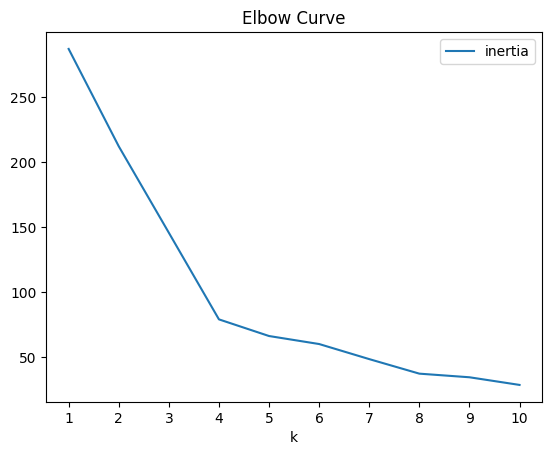

In [23]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia", title="Elbow Curve", xticks=k_values)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Based on the line plot, k slows significantly at a value of 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [25]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [26]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled_df)

KMeans(n_clusters=4)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_predict = model.predict(market_data_scaled_df)

# View the resulting array of cluster values.
k_predict

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [35]:
# Create a copy of the DataFrame
k_predict_df = market_data_scaled_df.copy()

In [38]:
# Add a new column to the DataFrame with the predicted clusters
market_data_scaled_df['Predictions'] = k_predict

# Display sample data
print(market_data_scaled_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

<Axes: title={'center': 'Clusters of Cryptocurrencies'}, xlabel='Price Change Percentage (24h)', ylabel='Price Change Percentage (7d)'>

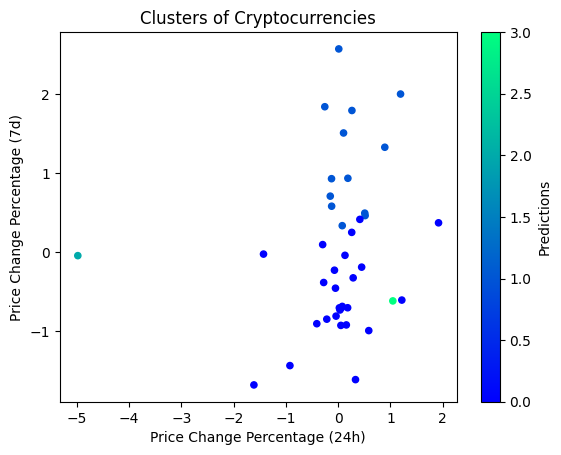

In [40]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_scaled_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Predictions",
    colormap="winter",
    title="Clusters of Cryptocurrencies",
    xlabel="Price Change Percentage (24h)",
    ylabel="Price Change Percentage (7d)",
)

### Optimize Clusters with Principal Component Analysis.

In [41]:
# Create a PCA model instance and set `n_components=3`.
PCA_model = PCA(n_components=3)

In [42]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
fit_transformed = PCA_model.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
fit_transformed[:5]

array([[ 1.02716415e-01,  1.09294014e+00,  5.35184395e-01],
       [ 7.67117769e-02,  7.04779064e-01,  1.03685543e+00],
       [-6.19998579e-01,  1.97690890e-02, -6.54034410e-01],
       [-6.64724714e-01, -2.17397355e-03, -4.85221049e-01],
       [ 2.88738674e-01,  2.43700872e+00,  1.79915657e+00]])

In [43]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
print(PCA_model.explained_variance_ratio_)

[0.38043081 0.33516548 0.17629339]


In [44]:
print(sum(PCA_model.explained_variance_ratio_))

0.8918896809358545


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** .89 we can explain just under 90% of variance with our three components.

In [46]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
pca_data_df = pd.DataFrame(
    fit_transformed, columns=["PC1", "PC2", "PC3"], index=market_data_scaled_df.index
)

# Copy the crypto names from the original data
market_data_scaled_df["coin_id"]=pca_data_df["coin_id"]

# Set the coinid column as index
pca_data_df = pca_data_df.set_index("coin_id")

# Display sample data
pca_data_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,0.102716,1.092940,0.535184
ethereum,0.076712,0.704779,1.036855
tether,-0.619999,0.019769,-0.654034
ripple,-0.664725,-0.002174,-0.485221
bitcoin-cash,0.288739,2.437009,1.799157


### Find the Best Value for k Using the PCA Data

In [49]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_data_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df[:10]

,k,inertia
0,1,272.113366
1,2,208.347495
2,3,138.912473
3,4,47.229370
4,5,36.132634
5,6,29.999207
6,7,28.569759
7,8,17.788697
8,9,15.200675
9,10,10.340957


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

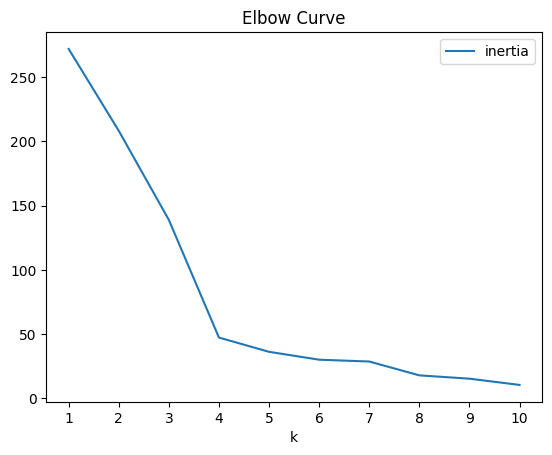

In [50]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x="k", y="inertia", title="Elbow Curve", xticks=k_values)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** When using the PCA data the best value for k is also 4 as the drastric drop in value levels out at this point.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No the k values at 4 in both data sets are the best values

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [55]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [56]:
# Fit the K-Means model using the PCA data
model.fit(pca_data_df)

KMeans(n_clusters=4)

In [57]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = model.predict(pca_data_df)

# Print the resulting array of cluster values.
print(predictions)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [60]:
# Create a copy of the DataFrame with the PCA data
pca_data_df_copy = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_data_df_copy["crypto_cluster"] = predictions

# Display sample data
pca_data_df_copy.head()

,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,0.102716,1.092940,0.535184,3
ethereum,0.076712,0.704779,1.036855,3
tether,-0.619999,0.019769,-0.654034,0
ripple,-0.664725,-0.002174,-0.485221,0
bitcoin-cash,0.288739,2.437009,1.799157,3


<Axes: title={'center': 'Clusters of Cryptocurrencies'}, xlabel='PCA 1', ylabel='PCA 2'>

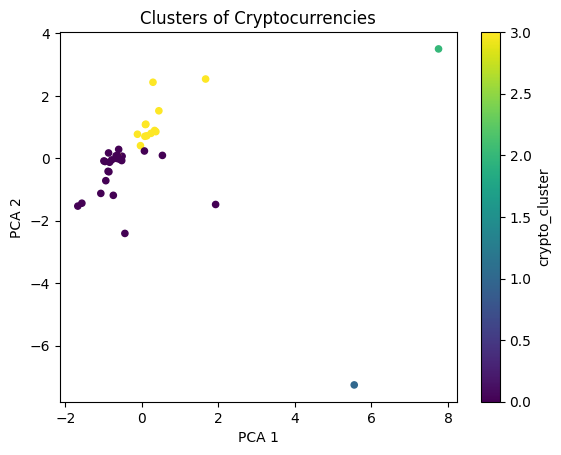

In [61]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_data_df.plot.scatter(
    x="PC1",
    y="PC2",
    c="crypto_cluster",
    colormap="viridis",
    title="Clusters of Cryptocurrencies",
    xlabel="PCA 1",
    ylabel="PCA 2",
)

### Determine the Weights of Each Feature on each Principal Component

In [66]:
# Use the columns from the original scaled DataFrame as the index.
pca_data_df.index = market_data_scaled_df.index

# Display sample data
pca_data_df.head()


,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,0.102716,1.092940,0.535184,3
ethereum,0.076712,0.704779,1.036855,3
tether,-0.619999,0.019769,-0.654034,0
ripple,-0.664725,-0.002174,-0.485221,0
bitcoin-cash,0.288739,2.437009,1.799157,3


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The strongest positive value is on PC2 at bitcoin-cash 2.437, and the strongest negative is PC1 at ripple with -0.664.
    